In [348]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [349]:
data = pd.read_csv('/Users/talaeter/Desktop/SVMdataset.csv')
data.head()
#data.shape

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [350]:
x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values
x = data.iloc[:, :-1].values

print(x[0:5])
#data['y'].value_counts()

[[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]
 [0.15553   0.784357 ]
 [0.210829  0.866228 ]]


In [351]:
#x = StandardScaler().fit_transform(x)
#train_ratio = 0.60
#validation_ratio = 0.20
#test_ratio = 0.20
#x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.25, random_state=1)


x1_train, x1_test, x2_train, x2_test = train_test_split( x1, x2, test_size=0.2, random_state=1)
x1_train, x1_val, x2_train, x2_val = train_test_split( x1_train, x2_train, test_size=0.25, random_state=1)


#print(x_train[0:5], x_val[0:5], x_test[0:5])

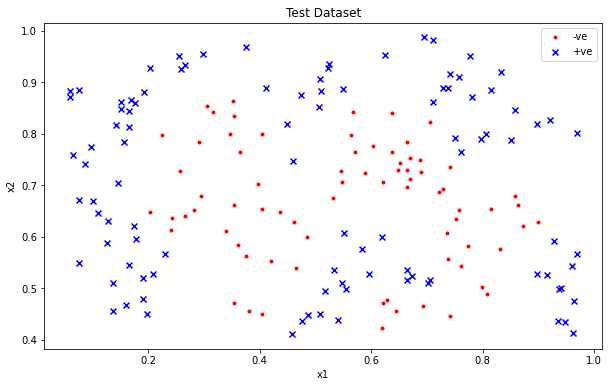

In [352]:
xplot, yplot= x_test, y_test
x1,x2= np.meshgrid(np.arange(start=xplot[:,0].min(), stop=xplot[:,0].max(), step=0.25),
                   np.arange(start=xplot[:,1].min(), stop=xplot[:,1].max(), step=0.25), )
m=['.','x']
clr=['red','blue']
for i,j in enumerate(np.unique(yplot)):
    plt.scatter(xplot[yplot==j,0], xplot[yplot==j,1], label=j, color=clr[i],marker=m[i])

plt.title('Test Dataset')    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(labels=['-ve','+ve'])
plt.show()

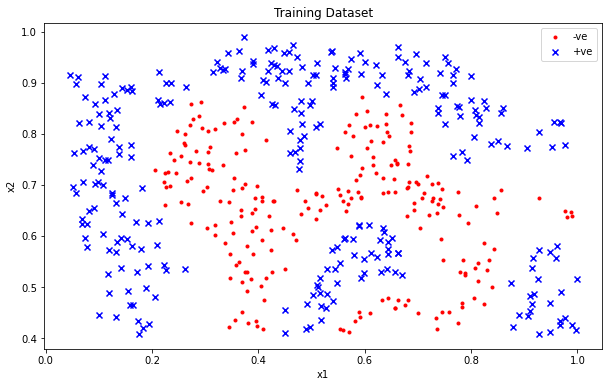

In [353]:
xplot, yplot= x_train, y_train
x1,x2= np.meshgrid(np.arange(start=xplot[:,0].min(), stop=xplot[:,0].max(), step=0.25), np.arange(start=xplot[:,1].min(), stop=xplot[:,1].max(), step=0.25), )
m=['.','x']
clr=['red','blue']
for i,j in enumerate(np.unique(yplot)):
    plt.scatter(xplot[yplot==j,0], xplot[yplot==j,1], label=j, color=clr[i],marker=m[i])

plt.title('Training Dataset')    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(labels=['-ve','+ve'])
plt.show()

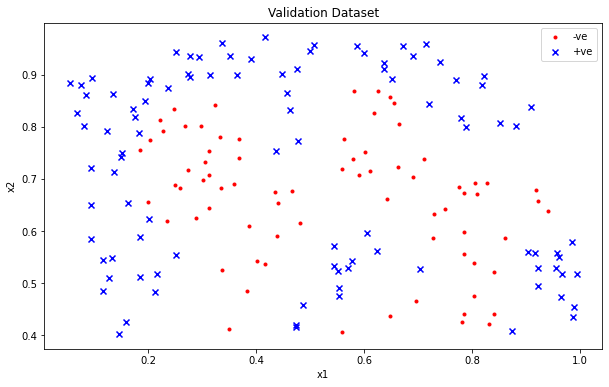

In [354]:
xplot, yplot= x_val, y_val
x1,x2= np.meshgrid(np.arange(start=xplot[:,0].min(), stop=xplot[:,0].max(), step=0.25),
                   np.arange(start=xplot[:,1].min(), stop=xplot[:,1].max(), step=0.25), )
m=['.','x']
clr=['red','blue']
for i,j in enumerate(np.unique(yplot)):
    plt.scatter(xplot[yplot==j,0], xplot[yplot==j,1], label=j, color=clr[i],marker=m[i])

plt.title('Validation Dataset')    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(labels=['-ve','+ve'])
plt.show()

In [355]:
linearclassifier = svm.SVC(kernel='linear', gamma='auto', C=2)
linearclassifier.fit(x_train, y_train)
y_predictlinear = linearclassifier.predict(x_val)

In [356]:
print(classification_report(y_val, y_predictlinear))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        75
           1       0.59      0.61      0.60        98

    accuracy                           0.54       173
   macro avg       0.53      0.53      0.53       173
weighted avg       0.54      0.54      0.54       173



In [357]:
rbfclassifier = svm.SVC(kernel='rbf', gamma=30, C=5)
rbfclassifier.fit(x_train, y_train)
y_predictrbf = rbfclassifier.predict(x_test)

In [358]:
print(classification_report(y_test, y_predictrbf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.98      0.98      0.98        99

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



In [359]:
optimal_c_l=0
scl=0.0
for c in np.arange(0.002, 0.40, 0.002):
    linearclassifier = svm.SVC(kernel='linear', gamma='auto', C=c)
    linearclassifier.fit(x_train, y_train)
    s=linearclassifier.score(x_val,y_val)
    if s>scl:
        scl=s
        optimal_c_l=c
print('Best Accuracy F1-Score for Linear: ', sc)
print('optimal C for Linear : ',optimal_c_l)


Best Accuracy F1-Score for Linear:  0.5664739884393064
optimal C for Linear :  0.002


In [360]:
optimal_c_g=0
scg=0.0
optimal_g=0
for c in np.arange(1, 32, 2):
    for g in np.arange(1, 39,3):
            rbfclassifier = svm.SVC(kernel='rbf', gamma=g, C=c)
            rbfclassifier.fit(x_train, y_train)
            s=rbfclassifier.score(x_test,y_test)
            if s>scg:
                scg=s
                optimal_c_g=c
                optimal_g=g

print('Best Accuracy F1-Score for Gaussian : ', scg)
print('optimal Gamma for Gaussian : ',optimal_g)
print('optimal C for Gaussian : ',optimal_c_g)

Best Accuracy F1-Score for Gaussian :  0.976878612716763
optimal Gamma for Gaussian :  31
optimal C for Gaussian :  3


In [361]:
#linearclassifier = svm.SVC(kernel='linear', gamma='auto', C=0.002)
#linearclassifier.fit(x_train, y_train)

In [362]:
y_predictlinear = linearclassifier.predict(x_val)
#clf=svm.SVC(random_state=0)
#clf.fit(x_train,y_train)
confusion_matrix(y_test, y_predictlinear)


array([[29, 45],
       [40, 59]])

In [363]:
y_predictlinear = linearclassifier.predict(x_val)
confusion_matrix(y_val, y_predictlinear)

array([[34, 41],
       [35, 63]])

In [364]:
y_predictlinear = linearclassifier.predict(x_train)
confusion_matrix(y_train, y_predictlinear)

array([[107, 127],
       [ 91, 192]])

In [365]:
y_predictrbf = rbfclassifier.predict(x_val)
#clf=svm.SVC(random_state=0)
#clf.fit(x_train,y_train)
confusion_matrix(y_test, y_predictrbf)


array([[31, 43],
       [41, 58]])

In [366]:
y_predictrbf = rbfclassifier.predict(x_train)
confusion_matrix(y_train, y_predictrbf)

array([[234,   0],
       [  0, 283]])

In [377]:
y_predictrbf = rbfclassifier.predict(x_val)
confusion_matrix(y_val, y_predictrbf)

array([[71,  4],
       [ 1, 97]])

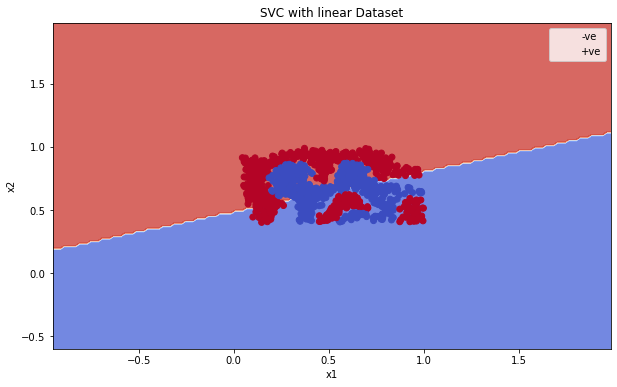

In [386]:
h=0.02

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = linearclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.title('SVC with linear Dataset')
plt.rcParams['figure.figsize']=(10,6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(labels=['-ve','+ve'])
plt.show()


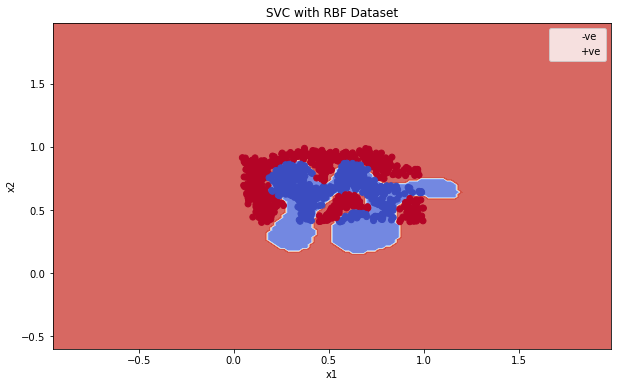

In [387]:
h=0.02

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with RBF Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(labels=['-ve','+ve'])
plt.show()

